# **Needed Command**
- install scikit-muiltiflow

In [1]:
!pip install scikit-multiflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.3 MB/s 


--------------------------------------------
# **Import Data and Classifier**
- Streaming Data
- Hoeffding Tree Classifier

In [2]:
from skmultiflow.data import WaveformGenerator
from skmultiflow.data import SEAGenerator 
from skmultiflow.trees import HoeffdingTreeClassifier
import matplotlib.pyplot as plt

- Run **One** of the Two Below Cells

In [ ]:
#dataStream = WaveformGenerator(random_state = 1)

In [3]:
dataStream = SEAGenerator(random_state = 1)

# **Create Model**
- Bagging
- 5 Hoeffding Tree

In [4]:
nBaseModel = 5
hoeffTree = []

for i in range(nBaseModel):
  hoeffTree = hoeffTree + [HoeffdingTreeClassifier()]
print(f'Total Model: Bagging of {nBaseModel} Hoeffding Tree.')

Total Model: Bagging of 5 Hoeffding Tree.


# **Train Model**
- Initializing

In [5]:
maxSample = 20000

In [6]:
def frequentItem(List):
    cntr = 0
    item = List[0]
    for i in List:
        currFrequency = List.count(i)
        if(currFrequency> cntr):
            cntr = currFrequency
            item = i
    return item

- Vote
- Poisson Distribution, lambda = 1
- Fit Instance to Model

In [7]:
import numpy as np

nSample = 0
corrSample = 0
accList = []

while nSample < maxSample and dataStream.has_more_samples():
  X, Y = dataStream.next_sample()

  yList = []
  for ht in hoeffTree:
    yList += [ht.predict(X)]

  votedItem = frequentItem(yList)
  if votedItem == Y:
    corrSample += 1
  
  for i in range(nBaseModel):
    pssnRand = np.random.poisson(1, 1)[0]
    if pssnRand > 10:
      pssnRand = 10
    for j in range(pssnRand):
      hoeffTree[i] = hoeffTree[i].partial_fit(X, Y)
  nSample += 1
  accList.append(corrSample/nSample)


# **Result**
- print Accuracy

In [8]:
print(f'Ensemble Hoeffding Tree: {nSample} Instance analyzed.')
print(f'Accuracy: {corrSample/nSample}')

Ensemble Hoeffding Tree: 20000 Instance analyzed.
Accuracy: 0.97415


----------------------------

# **Simple Hoeffing Tree**

In [9]:
from skmultiflow.data import WaveformGenerator
from skmultiflow.data import SEAGenerator
from skmultiflow.trees import HoeffdingTreeClassifier

ht = HoeffdingTreeClassifier()
dataStream = WaveformGenerator(random_state = 1)
#dataStream = SEAGenerator(random_state = 1)
X, Y = dataStream.next_sample()
nSample = 0
corrSample = 0
accListS = []

while nSample < maxSample and dataStream.has_more_samples():
    X, y = dataStream.next_sample()
    y_pred = ht.predict(X)
    if y[0] == y_pred[0]:
        corrSample += 1
    ht = ht.partial_fit(X, y)
    nSample += 1
    accListS.append(corrSample/nSample)

print(f'Simple Hoeffding Tree: {nSample} samples analyzed.')
print(f'Hoeffding Tree accuracy: {corrSample/nSample}')


Simple Hoeffding Tree: 20000 samples analyzed.
Hoeffding Tree accuracy: 0.8065


-------------------------------------------------------
# **PLOT**

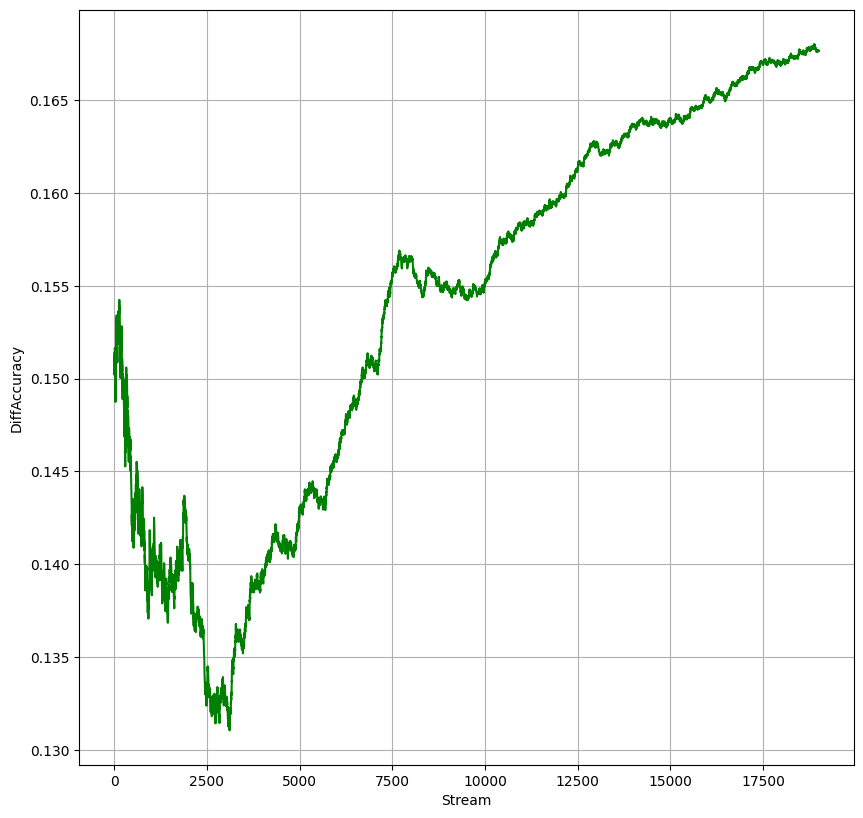

In [10]:
diffAcc = np.subtract(accList, accListS)
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(diffAcc[1000:], 'g')
plt.ylabel('DiffAccuracy')
plt.xlabel('Stream')
plt.grid(True)
plt.show()

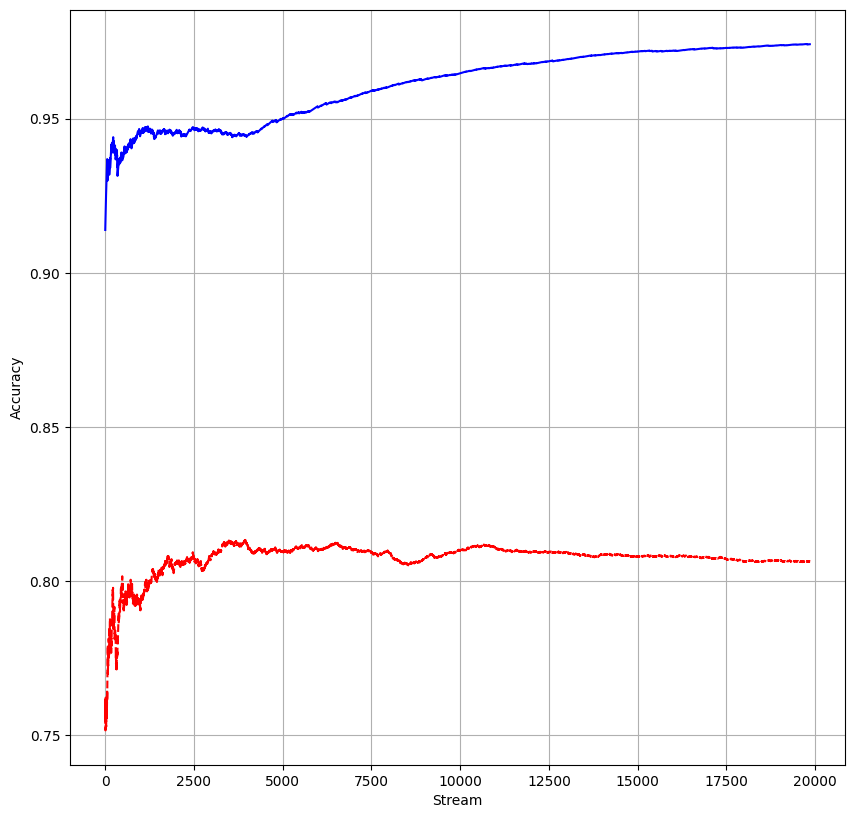

In [12]:
plt.figure(figsize=(10, 10), dpi=100)
plt.plot(accList[150:],'b' ,accListS[150:], 'r--')
plt.ylabel('Accuracy')
plt.xlabel('Stream')
plt.grid(True)
#plt.text(1000, .21, r'red: Simple Hoeffding Tree')
#plt.text(1000, .18, r'blue: Ensemble Hoeffding Tree')
plt.show()